In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.graphics.tsaplots import plot_pacf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [6]:
Data = pd.read_csv('C:/Users/DELL/Downloads/Time-Series-Analysis-master/Time-Series-Analysis-master/ice_cream.csv')

In [11]:
Data.columns=['DATE','Sales']

In [14]:
Data['DATE']=pd.to_datetime(Data['DATE'])

In [25]:
Data.set_index('DATE',inplace=True)

KeyError: "None of ['DATE'] are in the columns"

In [41]:
Data.head(12)

,Sales,Sales First diffrence
DATE,,
1972-01-01,59.9622,NaN
1972-02-01,67.0605,7.0983
1972-03-01,74.2350,7.1745
1972-04-01,78.1120,3.8770
1972-05-01,84.7636,6.6516
1972-06-01,100.5960,15.8324
1972-07-01,100.1263,-0.4697
1972-08-01,96.3607,-3.7656
1972-09-01,85.8007,-10.5600


<AxesSubplot:xlabel='DATE'>

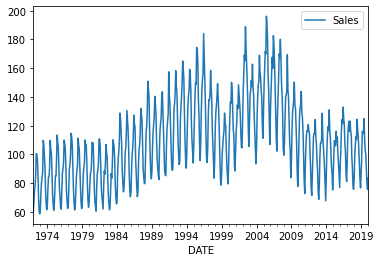

In [26]:
Data.plot()

In [27]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")

In [30]:
adfuller_test(Data['Sales'])

ADF Test Statistic : -1.7580087755105522
p-value : 0.4014992899407569
#Lags Used : 19
Number of Observations Used : 557
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


In [31]:
Data['Sales First diffrence']=Data['Sales']-Data['Sales'].shift(1)

In [32]:
Data

,Sales,Sales First diffrence
DATE,,
1972-01-01,59.9622,NaN
1972-02-01,67.0605,7.0983
1972-03-01,74.2350,7.1745
1972-04-01,78.1120,3.8770
1972-05-01,84.7636,6.6516
...,...,...
2019-09-01,100.1741,-2.4344
2019-10-01,90.1684,-10.0057
2019-11-01,79.7223,-10.4461


In [43]:
Data['Seasonal First Diffrence'] = Data['Sales'] - Data['Sales'].shift(12)

In [46]:
Data.head(14)

,Sales,Sales First diffrence,Seasonal First Diffrence
DATE,,,
1972-01-01,59.9622,NaN,NaN
1972-02-01,67.0605,7.0983,NaN
1972-03-01,74.2350,7.1745,NaN
1972-04-01,78.1120,3.8770,NaN
1972-05-01,84.7636,6.6516,NaN
1972-06-01,100.5960,15.8324,NaN
1972-07-01,100.1263,-0.4697,NaN
1972-08-01,96.3607,-3.7656,NaN
1972-09-01,85.8007,-10.5600,NaN


<AxesSubplot:xlabel='DATE'>

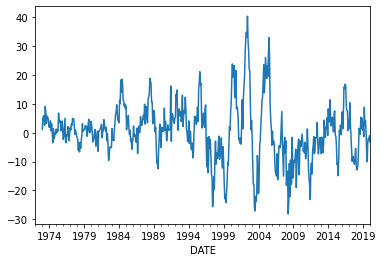

In [47]:
Data['Seasonal First Diffrence'].plot()

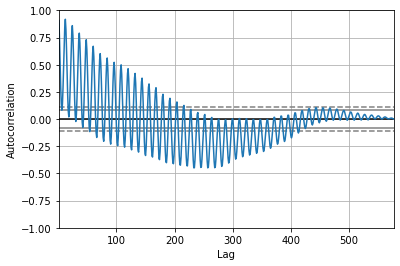

In [49]:
autocorrelation_plot(Data['Sales'])
plt.show()

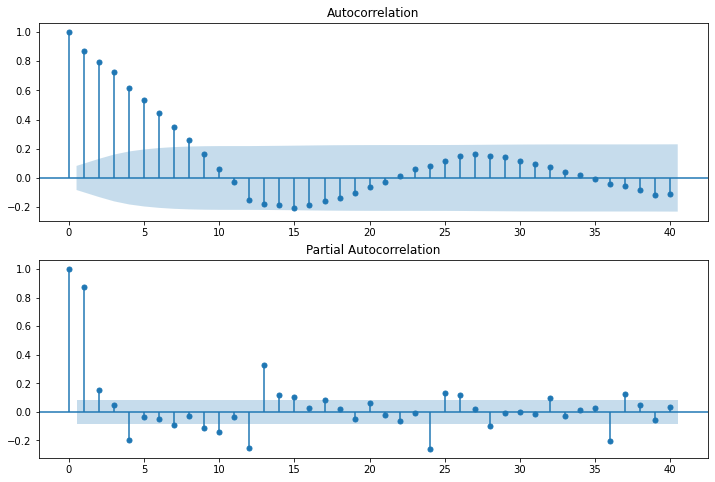

In [52]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = statsmodels.graphics.tsaplots.plot_acf(Data['Seasonal First Diffrence'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = statsmodels.graphics.tsaplots.plot_pacf(Data['Seasonal First Diffrence'].iloc[13:],lags=40,ax=ax2)

In [51]:
import statsmodels.api

In [59]:
577-13

564

In [59]:
577-13

564

In [53]:
from statsmodels.tsa.arima_model import ARIMA

In [55]:
model = ARIMA(Data['Sales'],order=(1,1,1))
model_fit = model.fit()

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will

In [56]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  576
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2170.935
Method:                       css-mle   S.D. of innovations             10.484
Date:                Tue, 17 Aug 2021   AIC                           4349.869
Time:                        16:22:28   BIC                           4367.294
Sample:                    02-01-1972   HQIC                          4356.664
                         - 01-01-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0645      0.830      0.078      0.938      -1.563       1.692
ar.L1.D.Sales     0.4836      0.061      7.920      0.000       0.364       0.603
ma.L1.D.Sales    -0.0168      0.063     -0.265      0.791      -0.141       0.108
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.0679           +0.0000j            2.0679            0.0000
MA.1           59.4638           +0.0000j           59.4638            0.0000
-----------------------------------------------------------------------------
"""

In [61]:
Data['Forcast'] = model_fit.predict(start=562,end=575,dynamic=True)

<AxesSubplot:xlabel='DATE'>

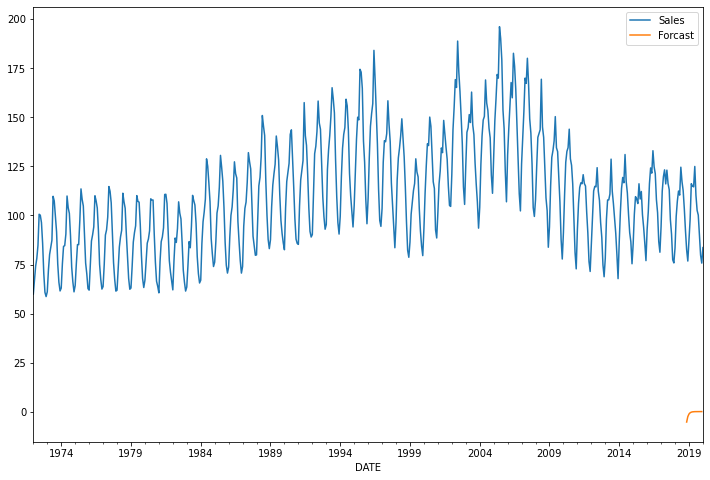

In [63]:
Data[['Sales','Forcast']].plot(figsize=(12,8))

In [64]:
import statsmodels.api as sm

In [65]:
model = sm.tsa.statespace.SARIMAX(Data['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [66]:
result = model.fit()

In [68]:
Data['Forcast']=result.predict(start=562,end=575,dynamic=True)

<AxesSubplot:xlabel='DATE'>

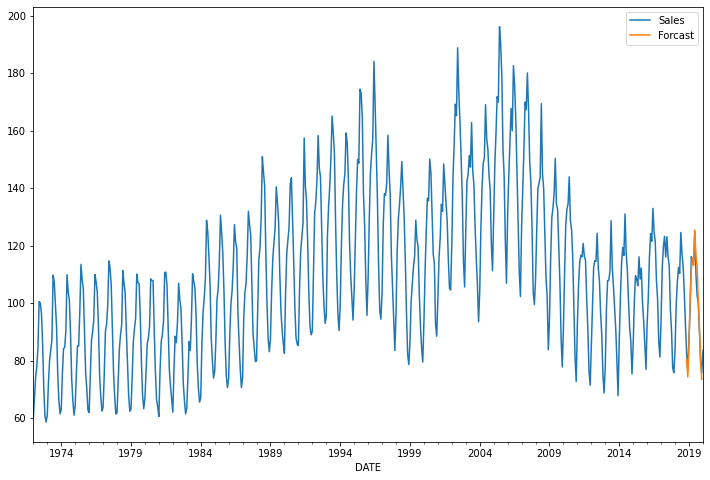

In [69]:
Data[['Sales','Forcast']].plot(figsize=(12,8))

In [70]:
from pandas.tseries.offsets import DateOffset
future_dates=[Data.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [72]:
future_datest_Data=pd.DataFrame(index=future_dates[1:],columns=Data.columns)

In [73]:
future_datest_Data.tail()

,Sales,Sales First diffrence,Seasonal First Diffrence,Forcast
2021-08-01,NaN,NaN,NaN,NaN
2021-09-01,NaN,NaN,NaN,NaN
2021-10-01,NaN,NaN,NaN,NaN
2021-11-01,NaN,NaN,NaN,NaN
2021-12-01,NaN,NaN,NaN,NaN


In [74]:
future_Data=pd.concat([Data,future_datest_Data])

<AxesSubplot:>

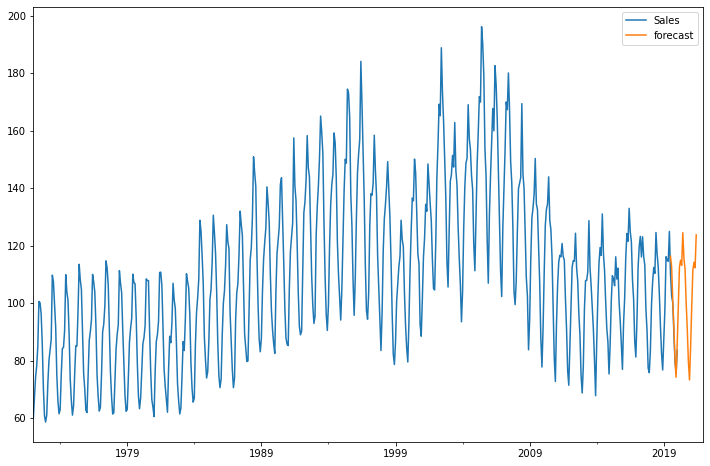

In [81]:
future_Data['forecast'] = result.predict(start = 570, end = 593, dynamic= True)  
future_Data[['Sales', 'forecast']].plot(figsize=(12, 8)) 